In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
%matplotlib inline
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

In [41]:
data = pd.read_csv("data/rent_with_income.csv")
data = data[data.Samples>0]
data = data.drop(["sum_w"], axis=1)
names= {"Zip_Code":"ZipCode", "income_mean":"MeanIncome", "Median":"MedianRent", 
        "Mean":"MeanRent", "income_median":"MedianIncome", "income_std":"StdevIncome",
       "Stdev":"StdevRent"}
data = data.rename(columns=names)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13673 entries, 0 to 13885
Data columns (total 17 columns):
State_Name      13673 non-null object
Place           13673 non-null object
ZipCode         13673 non-null int64
ALand           13673 non-null int64
AWater          13673 non-null int64
Lat             13673 non-null float64
Lon             13673 non-null float64
MeanRent        13673 non-null int64
MedianRent      13673 non-null int64
StdevRent       13673 non-null int64
Samples         13673 non-null int64
Population      13673 non-null int64
City            13673 non-null object
County          13673 non-null object
MeanIncome      13673 non-null int64
MedianIncome    13673 non-null int64
StdevIncome     13673 non-null int64
dtypes: float64(2), int64(11), object(4)
memory usage: 1.9+ MB


## Scatter plots

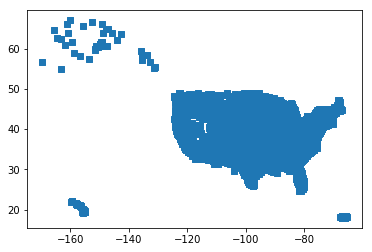

In [51]:
#Longitude vs Latitude
plt.scatter(data["Lon"], data["Lat"], marker=',')

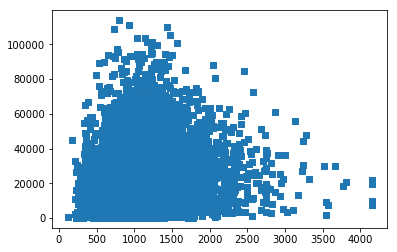

In [52]:
#Gross rent vs Population
plt.scatter(data["MeanRent"], data["Population"], marker=',')

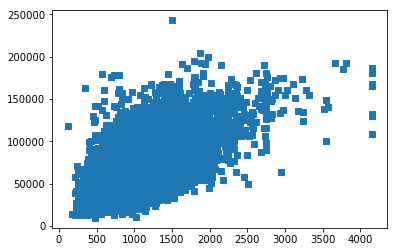

In [53]:
#Gross rent vs Average Income
plt.scatter(data["MeanRent"], data["MeanIncome"], marker=',')

## Data distributions

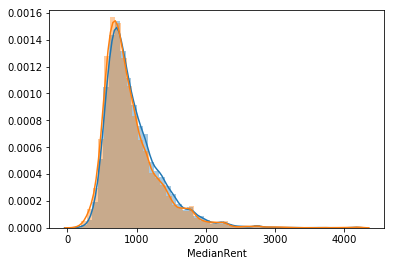

In [54]:
sns.distplot(data["MeanRent"])
sns.distplot(data["MedianRent"])

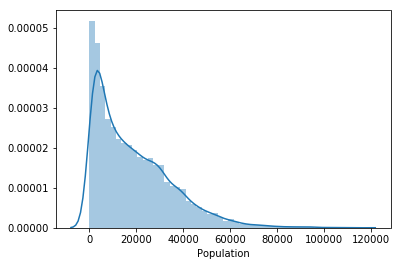

In [55]:
sns.distplot(data["Population"])

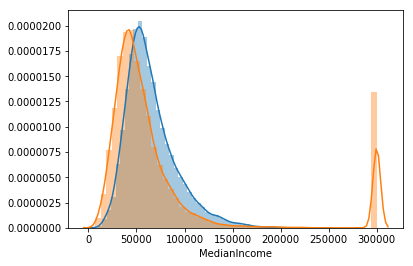

In [57]:
#blue plot
sns.distplot(data["MeanIncome"])
#orange plot
sns.distplot(data["MedianIncome"])

## Finding a cutoff for the samples

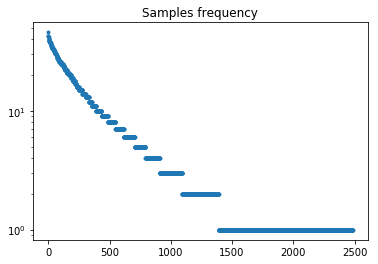

In [64]:
#plot number of times a sample frequency is repeated in the data
data.loc[data['Samples'].idxmax()]
samples_frequency= data['Samples'].value_counts().reset_index()
samples_frequency.rename(columns={'index':'count'}, inplace=True)
samples_frequency.sort_values("count", ascending=False)
plt.scatter(samples_frequency.index, samples_frequency.Samples, marker='.')
plt.yscale('log')
plt.title('Samples frequency')

In [65]:
data = data[data.MeanRent>0] 
data = data[data.Population>0]
data = data[data.MeanIncome>0]
data = data[data.Samples>100]

In [70]:
columns = ["StdevRent","Population", "MeanIncome","ALand","AWater", "Lon", "Lat" ]
columns_subset = ["Population", "MeanIncome","StdevRent"]
X_subset = data[columns_subset]
X = data[columns]
y = data["MeanRent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [71]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rent_pred = lm.predict(X_test)
lm.score(X_test, y_test)

0.6452458039879322

## Tuning the number of trees for the random forest algorithm:

In [75]:
RF_n_estimator = [10, 20, 30, 40, 50, 60,70, 80, 90, 100, 130, 160, 190, 210, 300, 400]
for estimator in RF_n_estimator:
    RF = RandomForestRegressor(n_estimators=estimator)
    RF.fit(X_train, y_train)
    print RF.score(X_test, y_test)

0.6817117549382445
0.7007667347791287
0.7043159006809254
0.7066475568010167
0.704491171951767
0.7064003027054901
0.7101905441637182
0.7106529588899709
0.7091458691931154
0.7128541658596936
0.7138044711296865
0.7141318977293766
0.7131392335730827
0.7132921959078053
0.7134875943678876
0.7135959571415005


In [72]:
RF = RandomForestRegressor(n_estimators=110)

In [73]:
#cross validation:
for model in [lm, RF]:
    scores = cross_val_score(model, X, y, cv=10)
    print scores
    print("%0.2str Accuracy: %0.2f (+/- %0.2f)" % (str(model) ,scores.mean(), scores.std() * 2))

[0.45481244 0.6526794  0.54551964 0.50847165 0.29866229 0.25845407
 0.52302925 0.63560694 0.64400232 0.48445794]
Litr Accuracy: 0.50 (+/- 0.26)
[0.55859327 0.67328448 0.61290788 0.57017661 0.46111989 0.37424196
 0.49014552 0.64704151 0.66016896 0.51168825]
Ratr Accuracy: 0.56 (+/- 0.18)


In [74]:
#cross validation on the data subset:
for model in [lm, RF]:
    scores = cross_val_score(model, X_subset, y, cv=10)
    print scores
    print("%0.2str Accuracy: %0.2f (+/- %0.2f)" % (str(model) ,scores.mean(), scores.std() * 2))

[0.53505594 0.61419747 0.60718829 0.49958855 0.23067095 0.21705631
 0.51383153 0.64587105 0.66097528 0.54933186]
Litr Accuracy: 0.51 (+/- 0.30)
[0.48722617 0.59260592 0.56258289 0.45190443 0.15822232 0.11296591
 0.48869646 0.59057852 0.61971793 0.50095981]
Ratr Accuracy: 0.46 (+/- 0.34)


LinearRegression    0.217056
RandomForest        0.199761
Name: 0, dtype: float64


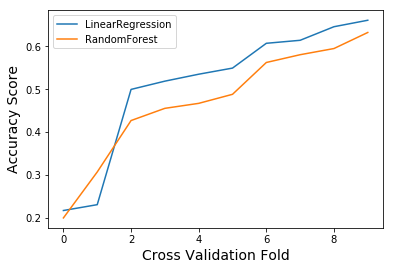

In [38]:
from pandas import DataFrame
table = [[0.21705631,
0.23067095,
0.49958855,
0.518855,
0.53505594,
0.54933186,
0.60718829,
0.61419747,
0.64587105,
0.66097528], [0.199761, 0.306964, 0.426949, 
                0.455429, 0.467052, 0.488154,0.562422,0.580557,
                0.594966,0.632438 ]]
df = DataFrame(table)
df = df.transpose()
df.columns = ['LinearRegression', 'RandomForest']
#df.sort_values(by=["LinearRegression","RandomForest"], ascending = True)
print df.loc[0]
df.to_csv('accuracy-regplot.csv')

df.plot()
plt.ylabel("Accuracy Score", fontsize=14)
plt.xlabel("Cross Validation Fold",fontsize=14)

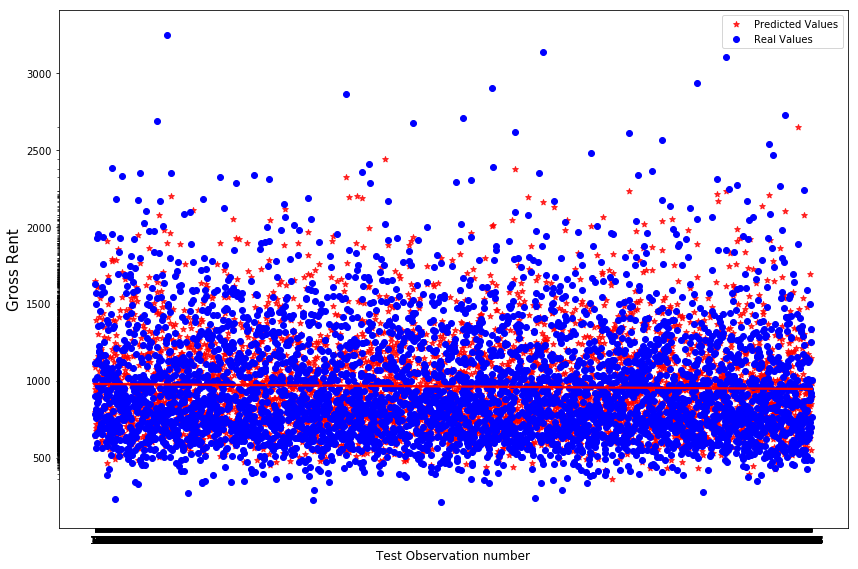

In [77]:
#linear Regression Result on Test Set
obs = [cpt for cpt in range(1,len(y_test)+1)]
rentSeriesTest = pd.Series(y_test.tolist())
obsSeries = pd.Series(obs)
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=obsSeries,y=rent_pred,truncate =True,color="red",marker="*",label="Predicted Values")
ax.scatter(obs, rentSeriesTest, color='blue', linewidth=1,label="Real Values")
ax.set_xticks(obs) 
#Showing all range of number of rooms on the x axis
ax.set_yticks(rent_pred, minor=True) #Showing all range of number of rooms on the x axis
#line1.set_dashes(dashes)
ax.set_ylabel('Gross Rent',fontsize=15)
ax.set_xlabel('Test Observation number',fontsize=12)
#ax.set_title('Prediction and real Value in test set',fontsize=15)
plt.tight_layout()
ax.legend(loc="best")
plt.show()
#plt.savefig("linear_regression_results.png")

In [ ]:
RF = RandomForestRegressor(n_estimators=110)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
RF.score(X_test, y_test)

0.7106114634294206

In [ ]:
#Random Forests Result on Test Set
obs = [cpt for cpt in range(1,len(y_test)+1)]
rentSeriesTest = pd.Series(y_test.tolist())
obsSeries = pd.Series(obs)
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(x=obsSeries,y=RF_pred,truncate =True,color="red",marker="*",label="Predicted Values")
ax.scatter(obs, rentSeriesTest, color='blue', linewidth=1,label="Real Values")
ax.set_xticks(obs) 
#Showing all range of number of rooms on the x axis
ax.set_yticks(RF_pred, minor=True) #Showing all range of number of rooms on the x axis
#line1.set_dashes(dashes)
ax.set_ylabel('Gross Rent',fontsize=12)
ax.set_xlabel('Test Observation number',fontsize=12)
#ax.set_title('Prediction and real Value in test set',fontsize=15)
plt.tight_layout()
ax.legend(loc="best")
#plt.savefig("random_forest_results.png")
plt.show()